In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from xgboost import XGBClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

import pickle

from scipy import stats

import warnings

warnings.filterwarnings('ignore')

In [5]:
ar=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/major project/Airline_Reviews.csv")
ar.head(5)

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


In [6]:
ar.shape

(23171, 20)

In [7]:
ar.info

<bound method DataFrame.info of        Unnamed: 0   Airline Name Overall_Rating  \
0               0    AB Aviation              9   
1               1    AB Aviation              1   
2               2    AB Aviation              1   
3               3  Adria Airways              1   
4               4  Adria Airways              1   
...           ...            ...            ...   
23166       23166         ZIPAIR              1   
23167       23167         ZIPAIR              1   
23168       23168         ZIPAIR              3   
23169       23169         ZIPAIR              6   
23170       23170         ZIPAIR              1   

                                 Review_Title          Review Date  Verified  \
0                     "pretty decent airline"   11th November 2019      True   
1                        "Not a good airline"       25th June 2019      True   
2              "flight was fortunately short"       25th June 2019      True   
3         "I will never fly again w

In [8]:
nar=ar.drop(['Inflight Entertainment', 'Wifi & Connectivity', 'Aircraft', 'Value For Money',
'Cabin Staff Service', 'Unnamed: 0', 'Review Date', 'Review_Title', 'Review'], axis=1)

In [9]:
nar ['Overall_Rating']=nar ['Overall_Rating'].replace(['1','2','3','4','5','6','7','8','9','n'],['1','2','3','4','5','6','7','8','9','10'])

In [10]:
nar['Type Of Traveller']=nar['Type Of Traveller'].fillna(nar['Type Of Traveller'].mode() [0])
nar['Seat Type']=nar['Seat Type']. fillna(nar['Seat Type' ] .mode () [0])
nar['Seat Comfort']=nar['Seat Comfort'].fillna(nar['Seat Comfort' ] .mode() [0])
nar['Route']=nar['Route'].fillna(nar['Route' ].mode () [0])
nar['Date Flown']=nar['Date Flown']. fillna(nar['Date Flown'] .mode () [0])
nar['Food & Beverages' ]=nar['Food & Beverages'].fillna(nar['Food & Beverages' ].mode () [0])
nar['Ground Service' ]=nar['Ground Service'].fillna(nar['Ground Service' ].mode()[0])
#For the above columns we are using mode instead of median even though numerical values are present
#because the column consists of categories(0 to 5).So its considered as categorical data

In [11]:
nar[['Month Flown', 'Year Flown']] = nar['Date Flown'].str.split(expand=True)


In [12]:
nar['Origin']=nar.Route.str.split(' to ', expand=True)[0]
nar['Destination']=nar. Route. str.split(' to ',expand=True) [1]
# Route column has 3 values i.e., eg. Place A to Place B via Place C , so inorder to chose
#,we gave indices for Moroni as 0 & Moheli as 1, and then run the split function again to remove 'via'
nar['Destination']=nar.Destination.str.split(' via ',expand=True) [0]

In [13]:
del nar['Route']
del nar['Date Flown']

In [14]:
nar['Origin']=nar['Origin'].replace(['Tel Avivito Malta (MLA)', 'Bangalore toChennai', 'JFK toTLV via Baku', 'Krabi toBangkok', 'Hong Kong To Shanghai',
'Edinburgh To Fuerteventura', 'Nuremburg toHamburg', 'Mumbai toJaipur', 'Sydney to- New York via Soul',
'London Gatwick - Bangkok', 'SIN toi MFM', 'Jakartato Yogyakarta', 'Cardiff-Malta return', 'KIV-LIS',
'GRR-ORD' , 'LCY-FRA', 'NAP-RMF return', 'LEB-BOS', 'Bucharest-Brussels', 'Da Nang - Hong Kong ', 'New-York',
'LHR-DXB', 'Dublin - Charlotte', 'Kansas City via Dallas Ft Worth', 'Sydney via Singapore',
'Geneva via Brussels', 'Nursultan via Dubai', 'Denpasar Medan via Jakarta',
'Auckland Denpasar via Sydney / Melbourne', 'Lima via Santiago', 'Manila via Los Angeles',
'Dar es Salaam via Kigali', 'Singapore via Sydney', 'Grand Rapidsvto Orlando via Chicago',
'Toronto via Varadero', 'Bangkok via Mumbai', 'A Coruna via Bilbao', 'LHR-DXB ',
'Paris Orly Los Angeles', 'Newark Los Angeles', 'Honolulu Seattle ', 'San {Paulo'],
['Tel Aviv(MLA)', 'Bangalore', 'JFK', 'Krabi', 'Hong Kong', 'Edinburgh', 'Nuremburg', 'Mumbai',
'Sydney', 'London Gatwick', 'SIN', 'Jakarta', 'Cardiff', 'KIV', 'GRR', 'LCY', 'NAP', 'LEB', 'Bucharest',
'Da Nang', 'New York', 'LHR', 'Dublin', 'Kansas City', 'Sydney', 'Geneva', 'Nursultan', 'Denpasar Medan',
'Auckland Denpasar', 'Lima', 'Manila', 'Dar es Salaam', 'Singapore', 'Grand Rapidsvto Orlando',
'Toronto', 'Bangkok', 'A Coruna', 'LHR', 'Paris Orly', 'Newark', 'Honolulu', 'San Paulo'])

In [15]:
#Destination recorrections
j=0
row_num=[2172, 3788, 5112, 5368, 7000, 8314, 9107, 10589, 12993, 17759, 20572,
20930, 2225, 2380, 4339, 5182, 5785, 6382, 10991, 12573, 17051, 21497,
4293,6215,9787,10207, 12372, 13556, 16022, 17217, 17732, 18774,
19462, 20112, 22449, 11584, 10001, 12258, 10886]
new_des=['Malta', 'Chennai', 'TLV', 'Bangkok', 'Shanghai', 'Fuerteventura', 'Hamburg',
'Jaipur', 'New York', 'Bangkok', 'MFM', 'Yogyakarta', 'Malta', 'LIS', 'ORD', 'FRA',
'RMF', 'BOS', 'Brussels', 'Hong Kong', 'DXB', 'Charlotte', 'Dallas Ft Worth',
'Brussels', 'Dubai', 'Jakarta', 'Sydney / Melbourne', 'Santiago', 'Los Angeles', 'Kigali',
'Sydney', 'Chicago', 'Varadero', 'Mumbai', 'Bilbao', 'Dallas', 'Los Angeles', 'Los Angeles', 'Seattle ']
for i in row_num:
  nar.at[i,'Destination']=new_des[j]
j+=1

In [16]:
new_column_order=['Airline Name', 'Seat Type', 'Type Of Traveller', 'Origin',
'Destination', 'Month Flown', 'Year Flown','Verified', 'Seat Comfort',
'Food & Beverages', 'Ground Service', 'Overall_Rating', 'Recommended']

In [17]:
nar=nar.reindex(columns=new_column_order)

In [18]:
nar.head()

,Airline Name,Seat Type,Type Of Traveller,Origin,Destination,Month Flown,Year Flown,Verified,Seat Comfort,Food & Beverages,Ground Service,Overall_Rating,Recommended
0,AB Aviation,Economy Class,Solo Leisure,Moroni,Moheli,November,2019,True,4.0,4.0,4.0,9,yes
1,AB Aviation,Economy Class,Solo Leisure,Moroni,Anjouan,June,2019,True,2.0,1.0,1.0,1,no
2,AB Aviation,Economy Class,Solo Leisure,Anjouan,Dzaoudzi,June,2019,True,2.0,1.0,1.0,1,no
3,Adria Airways,Economy Class,Solo Leisure,Frankfurt,Pristina,September,2019,False,1.0,1.0,1.0,1,no
4,Adria Airways,Economy Class,Couple Leisure,Sofia,Amsterdam,September,2019,True,1.0,1.0,1.0,1,no


In [19]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
le4=LabelEncoder()
le5=LabelEncoder()
le6=LabelEncoder()
le7=LabelEncoder()
le8=LabelEncoder()
le9=LabelEncoder()
le10=LabelEncoder()

In [20]:
nar['Airline Name']=le1.fit_transform(nar['Airline Name'])
nar['Seat Type']=le2.fit_transform(nar['Seat Type'])
nar['Type Of Traveller']=le3.fit_transform(nar['Type Of Traveller'])
nar['Origin']=le4.fit_transform(nar['Origin'])
nar['Destination']=le5.fit_transform(nar['Destination'])
nar['Month Flown']=le6.fit_transform(nar['Month Flown'])
nar['Year Flown']=le7.fit_transform(nar['Year Flown'])
nar['Verified']=le8.fit_transform(nar['Verified'])
nar['Overall_Rating']=le9.fit_transform(nar['Overall_Rating'])
nar['Recommended']=le10.fit_transform(nar['Recommended'])

In [21]:
nar.head()

,Airline Name,Seat Type,Type Of Traveller,Origin,Destination,Month Flown,Year Flown,Verified,Seat Comfort,Food & Beverages,Ground Service,Overall_Rating,Recommended
0,0,1,3,1271,1545,9,6,1,4.0,4.0,4.0,9,1
1,0,1,3,1271,107,6,6,1,2.0,1.0,1.0,0,0
2,0,1,3,79,672,6,6,1,2.0,1.0,1.0,0,0
3,4,1,3,628,1927,11,6,0,1.0,1.0,1.0,0,0
4,4,1,1,1827,99,11,6,1,1.0,1.0,1.0,0,0


In [22]:
nar.describe()

,Airline Name,Seat Type,Type Of Traveller,Origin,Destination,Month Flown,Year Flown,Verified,Seat Comfort,Food & Beverages,Ground Service,Overall_Rating,Recommended
count,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000
mean,245.027880,0.973242,2.008675,1071.619913,1451.637392,5.495188,7.705321,0.531785,2.328126,1.972207,2.073713,2.565966,0.336930
std,144.313766,0.457584,1.077595,557.267275,799.835129,3.019861,2.512480,0.498999,1.465062,1.422340,1.523264,3.235551,0.472671
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,124.000000,1.000000,1.000000,615.000000,728.500000,3.000000,6.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,237.000000,1.000000,2.000000,1221.000000,1494.000000,6.000000,9.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
75%,373.000000,1.000000,3.000000,1396.000000,2343.000000,7.000000,10.000000,1.000000,4.000000,3.000000,3.000000,5.000000,1.000000
max,496.000000,3.000000,3.000000,2167.000000,2690.000000,11.000000,10.000000,1.000000,5.000000,5.000000,5.000000,9.000000,1.000000


[Text(0.5, 0, 'index')]

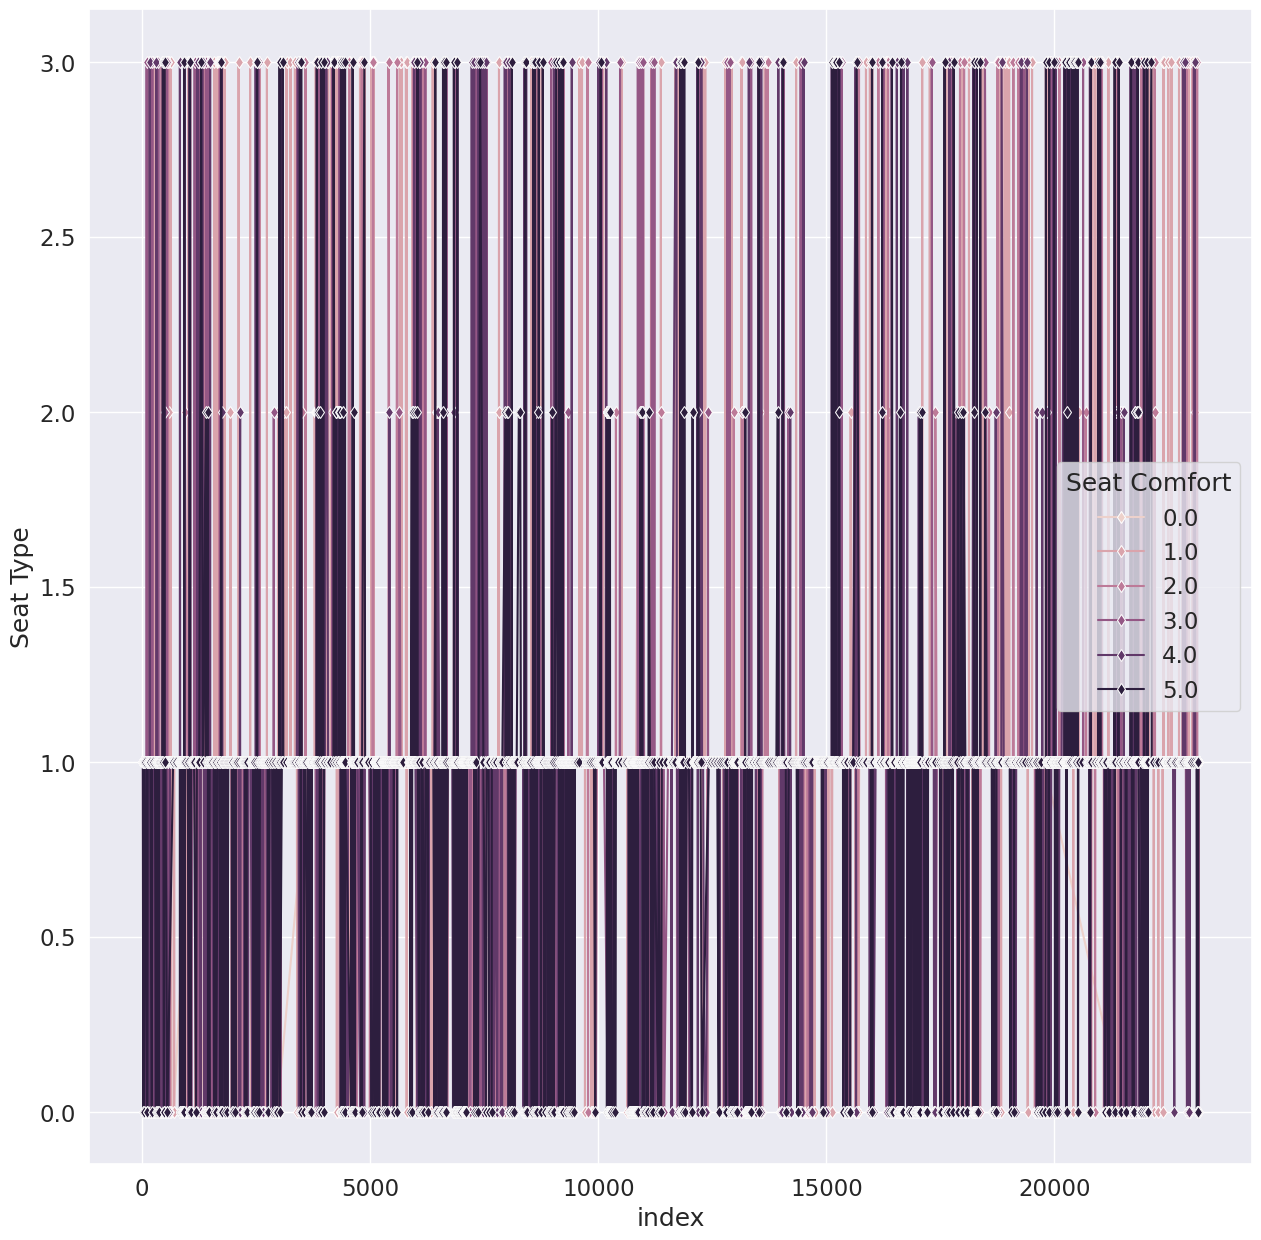

In [23]:
#Line plot in seaborn
sns.set(rc={'figure.figsize': [15,15]})
sns.set(font_scale=1.5)
fig=sns.lineplot(x=nar.index,y=nar['Seat Type'],markevery=1,marker='d',
hue=nar['Seat Comfort'])
fig.set(xlabel='index')

([<matplotlib.patches.Wedge at 0x7da6b89ef460>,
 [Text(-0.4255806105829949, -1.0143377858957072, 'E_c'),
  Text(0.5370556832029272, 0.9599849963095451, 'B_c'),
  Text(0.15134436463791998, 1.0895388397355756, ' P_e'),
  Text(0.027737504813067807, 1.099650231131129, 'F_c')],
 [Text(-0.23213487849981534, -0.5532751559431129, '87.355'),
  Text(0.292939463565233, 0.5236281798052064, '9.054'),
  Text(0.08255147162068362, 0.5942939125830412, '2.788'),
  Text(0.015129548079855165, 0.5998092169806156, '0.803')])

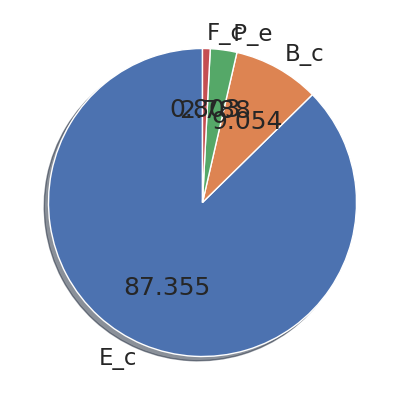

In [24]:
plt.figure(figsize=(5,5))
plt.pie(nar['Seat Type'].value_counts(),startangle=90,autopct='%.3f',
labels=['E_c', 'B_c',' P_e','F_c'], shadow=True)

<Axes: xlabel='Type Of Traveller', ylabel='Overall_Rating'>

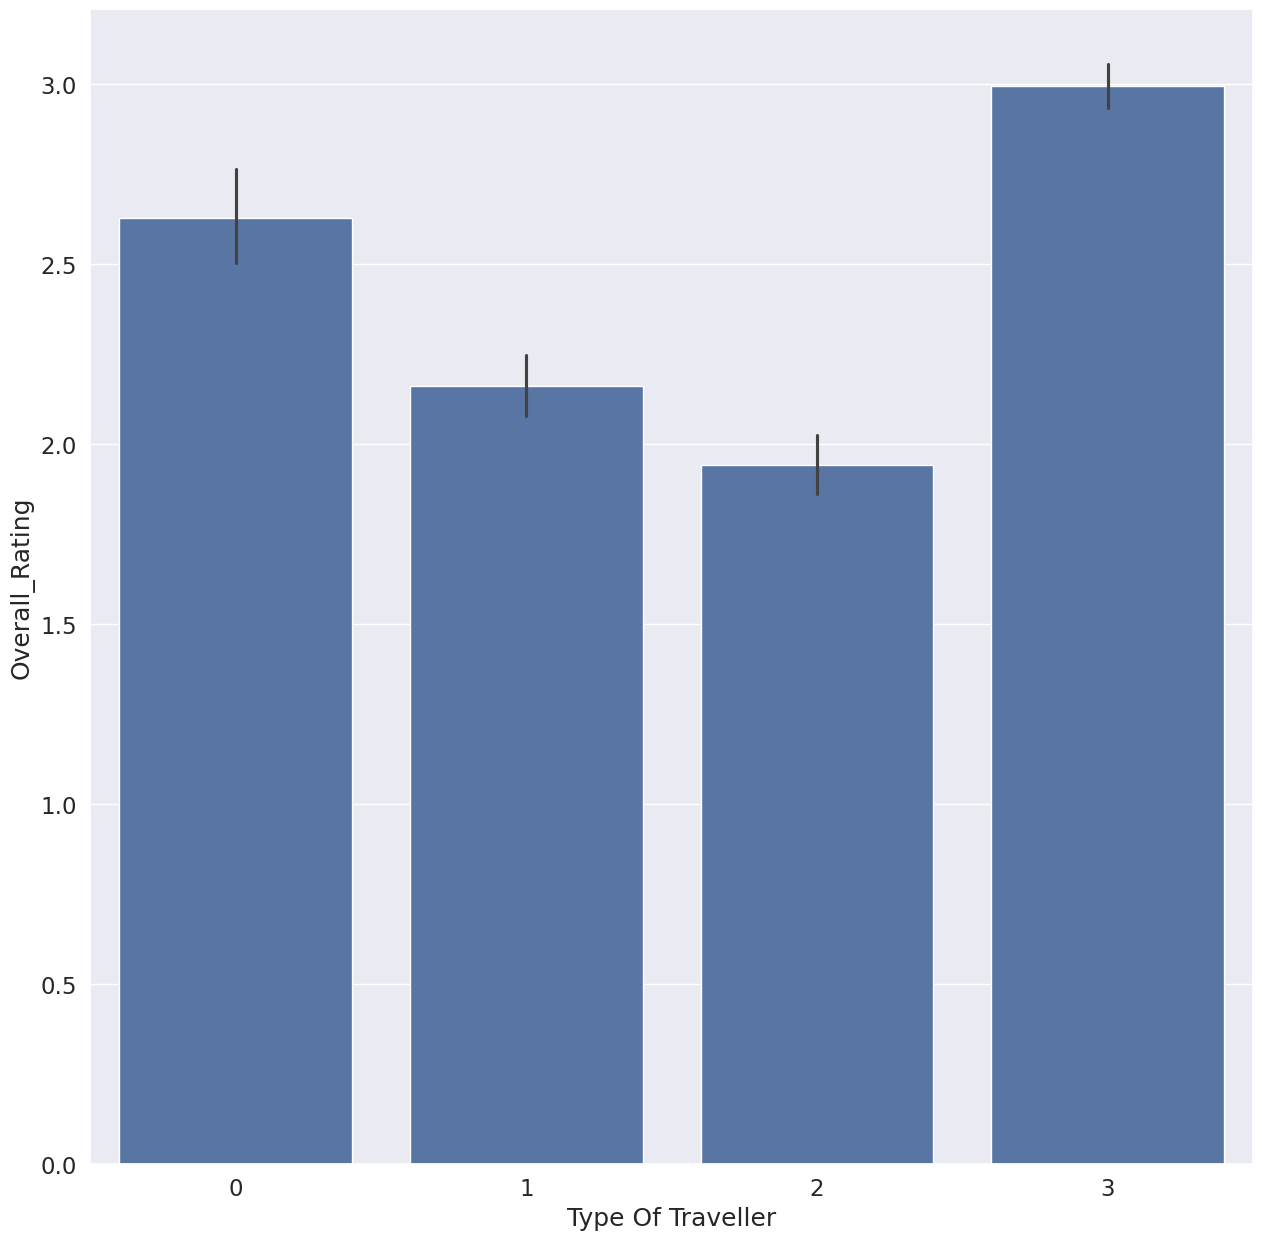

In [87]:
sns.barplot(data=nar, x='Type Of Traveller', y='Overall_Rating')

<Axes: >

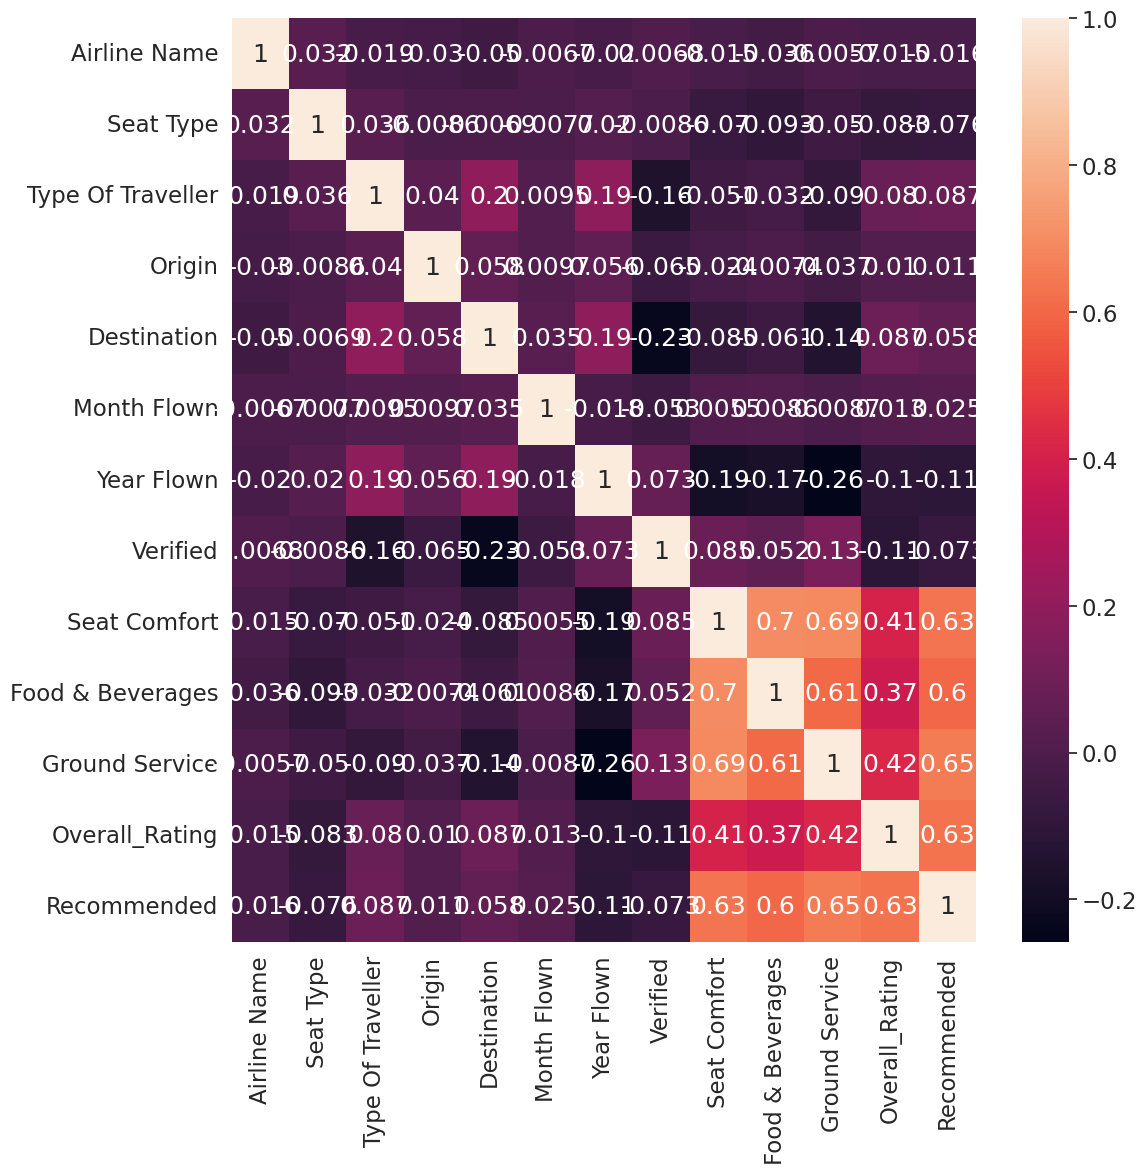

In [25]:
plt.subplots(figsize=(12,12))
sns.heatmap(nar.corr(),annot=True)

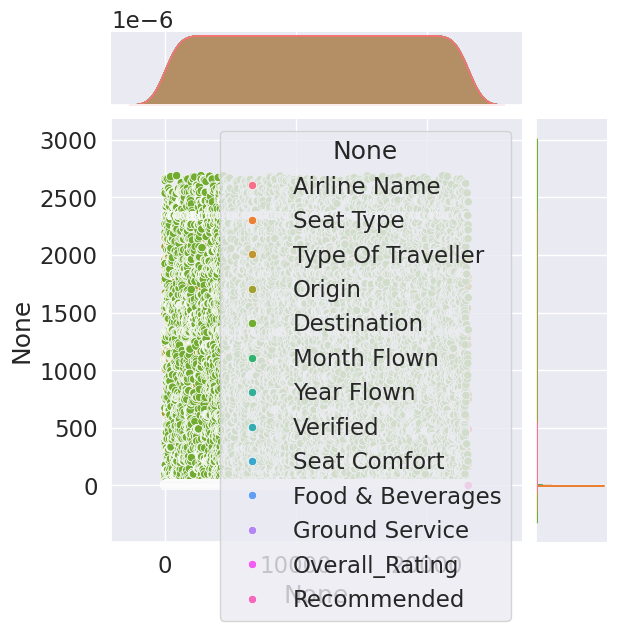

In [26]:
sns.jointplot(nar)

In [27]:
X=nar.iloc[:,0:12].values
y=nar.iloc[:,12:13].values

In [28]:
X

array([[  0.,   1.,   3., ...,   4.,   4.,   9.],
       [  0.,   1.,   3., ...,   1.,   1.,   0.],
       [  0.,   1.,   3., ...,   1.,   1.,   0.],
       ...,
       [487.,   1.,   0., ...,   2.,   1.,   3.],
       [487.,   0.,   0., ...,   3.,   1.,   6.],
       [487.,   1.,   3., ...,   1.,   1.,   0.]])

In [29]:
y

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [30]:
nar.Recommended.value_counts()

0    15364
1     7807
Name: Recommended, dtype: int64

In [31]:
# As the values are over_sampling we need to use smote technique
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='auto',random_state=50)

In [32]:
X,y=smote.fit_resample(X,y)

In [33]:
np.count_nonzero(y==1)

15364

In [34]:
np.count_nonzero(y==0)

15364

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [37]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
import pickle
pickle.dump(ss, open('ar_ss.pkl','wb'))

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',random_state=50)

In [39]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=50)

In [40]:
pred_dt=dtc.predict(X_test)
pred_dt

array([1, 0, 0, ..., 1, 1, 0])

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

fpr_dt, tpr_dt, threshold_dt=roc_curve(y_test,pred_dt)

print(classification_report(y_test,pred_dt))

roc_auc_dt=auc(fpr_dt,tpr_dt)
print("roc_auc_dt :", roc_auc_dt)

cm_dt=confusion_matrix(y_test,pred_dt)
print("cm_dt:",cm_dt)

as_dt=accuracy_score(y_test,pred_dt)
print("as_dt:",as_dt)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3116
           1       0.95      0.95      0.95      3030

    accuracy                           0.95      6146
   macro avg       0.95      0.95      0.95      6146
weighted avg       0.95      0.95      0.95      6146

roc_auc_dt : 0.9524664565301203
cm_dt: [[2973  143]
 [ 149 2881]]
as_dt: 0.9524894240156199


In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

In [43]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [44]:
pred_knn=knn.predict(X_test)
pred_knn

array([1, 0, 0, ..., 1, 1, 0])

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
fpr_knn, tpr_knn, threshold_knn=roc_curve(y_test,pred_knn)

print(classification_report(y_test,pred_knn))

roc_auc_knn=auc(fpr_knn,tpr_knn)
print("roc_auc_knn :",roc_auc_knn)

cm_knn=confusion_matrix(y_test,pred_knn)
print("cm_knn:",cm_knn)

as_knn=accuracy_score(y_test,pred_knn)
print("as_knn:", as_knn)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3116
           1       0.93      0.95      0.94      3030

    accuracy                           0.94      6146
   macro avg       0.94      0.94      0.94      6146
weighted avg       0.94      0.94      0.94      6146

roc_auc_knn : 0.9409450636976406
cm_knn: [[2894  222]
 [ 142 2888]]
as_knn: 0.9407744874715261


In [46]:
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression()

In [47]:
Lr.fit(X_train,y_train)

LogisticRegression()

In [48]:
pred_Lr=Lr.predict(X_test)
pred_Lr

array([1, 0, 0, ..., 1, 1, 0])

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
fpr_Lr,tpr_Lr, threshold_Lr=roc_curve(y_test, pred_Lr)

print(classification_report(y_test,pred_Lr))

roc_auc_Lr=auc(fpr_Lr,tpr_Lr)
print("roc_auc_Lr :", roc_auc_Lr)

cm_Lr=confusion_matrix(y_test,pred_Lr)
print("cm_Lr:",cm_Lr)

as_Lr=accuracy_score(y_test,pred_Lr)
print("as_Lr:",as_Lr)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      3116
           1       0.92      0.92      0.92      3030

    accuracy                           0.92      6146
   macro avg       0.92      0.92      0.92      6146
weighted avg       0.92      0.92      0.92      6146

roc_auc_Lr : 0.9216143019950263
cm_Lr: [[2863  253]
 [ 229 2801]]
as_Lr: 0.9215750081353726


In [50]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [51]:
gnb.fit(X_train,y_train)

GaussianNB()

In [53]:
pred_nb=gnb.predict(X_test)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
fpr_gnb, tpr_gnb, threshold_gnb=roc_curve(y_test,pred_Lr)

print(classification_report(y_test,pred_Lr))

roc_auc_nb=auc(fpr_gnb,tpr_gnb)
print("roc_auc_nb :",roc_auc_nb)

cm_nb=confusion_matrix(y_test,pred_nb)
print("cm_nb:",cm_nb)

as_nb=accuracy_score(y_test,pred_nb)
print("as_nb:",as_nb)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      3116
           1       0.92      0.92      0.92      3030

    accuracy                           0.92      6146
   macro avg       0.92      0.92      0.92      6146
weighted avg       0.92      0.92      0.92      6146

roc_auc_nb : 0.9216143019950263
cm_nb: [[2755  361]
 [ 202 2828]]
as_nb: 0.9083957045232671


In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=2)

In [56]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=2)

In [57]:
pred_rfc=rfc.predict(X_test)
pred_rfc

array([1, 0, 0, ..., 1, 1, 0])

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve, auc
fpr_rfc,tpr_rfc,threshold_rfc=roc_curve(y_test,pred_rfc)

print(classification_report(y_test,pred_rfc))

roc_auc_rfc=auc(fpr_rfc,tpr_rfc)
print("roc_auc_rfc :",roc_auc_rfc)

cm_rfc=confusion_matrix(y_test,pred_rfc)
print("cm_rfc:",cm_rfc)

as_rfc=accuracy_score(y_test,pred_rfc)
print("as_rfc:",as_rfc)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3116
           1       0.96      0.96      0.96      3030

    accuracy                           0.96      6146
   macro avg       0.96      0.96      0.96      6146
weighted avg       0.96      0.96      0.96      6146

roc_auc_rfc : 0.9607320038807476
cm_rfc: [[3006  110]
 [ 131 2899]]
as_rfc: 0.9607875040676863


In [59]:
from sklearn.svm import SVC
svc=SVC()

In [60]:
svc.fit(X_train,y_train)

SVC()

In [61]:
pred_svc=svc.predict(X_test)
pred_svc

array([1, 0, 0, ..., 1, 1, 0])

In [62]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
fpr_svc, tpr_svc,threshold_svc=roc_curve(y_test,pred_svc)

print(classification_report(y_test,pred_svc))

roc_auc_svc=auc(fpr_svc, tpr_svc)
print("roc_auc_svc :", roc_auc_svc)

cm_svc=confusion_matrix(y_test,pred_svc)
print("cm_svc:", cm_svc)

as_svc=accuracy_score(y_test,pred_svc)
print("as_svc:",as_svc)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3116
           1       0.95      0.93      0.94      3030

    accuracy                           0.94      6146
   macro avg       0.94      0.94      0.94      6146
weighted avg       0.94      0.94      0.94      6146

roc_auc_svc : 0.9395997237721205
cm_svc: [[2972  144]
 [ 226 2804]]
as_svc: 0.9397982427595184


In [63]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [64]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [71]:
pred_xgb=xgb.predict(X_test)

In [72]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
fpr_xgb, tpr_xgb, threshold_xgb=roc_curve(y_test, pred_xgb)

print(classification_report(y_test,pred_xgb))

roc_auc_xgb=auc(fpr_xgb,tpr_xgb)
print("roc_auc_xgb :",roc_auc_xgb)

cm_xgb=confusion_matrix(y_test,pred_xgb)
print("cm_xgb:",cm_xgb)

as_xgb=accuracy_score(y_test,pred_xgb)
print("as_xgb:",as_xgb)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      3116
           1       0.97      0.96      0.96      3030

    accuracy                           0.96      6146
   macro avg       0.96      0.96      0.96      6146
weighted avg       0.96      0.96      0.96      6146

roc_auc_xgb : 0.9633130610878803
cm_xgb: [[3019   97]
 [ 128 2902]]
as_xgb: 0.9633908232997072


In [73]:
pred_xgb1=xgb.predict(X_train)

In [74]:
print(classification_report(y_train,pred_xgb1))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     12248
           1       0.99      0.98      0.99     12334

    accuracy                           0.99     24582
   macro avg       0.99      0.99      0.99     24582
weighted avg       0.99      0.99      0.99     24582



In [75]:
xgb.predict([[4,71,1,3,900,1133,1,6,1,5,5,5]])

array([1])

In [76]:
com=pd.DataFrame({'Model':['DecisionTree Classification', 'K-Nearest Neighbours',
'Logistic Regression', 'Naive Bayes Classification',
'RandomForest Classification', 'Support Vector Machine', 'XGBClassifier'],
'roc_auc': [roc_auc_dt, roc_auc_knn, roc_auc_Lr, roc_auc_nb,roc_auc_rfc, roc_auc_svc, roc_auc_xgb],
'accuracy': [as_dt,as_knn, as_Lr,as_nb,as_rfc, as_svc, as_xgb]})

In [77]:
com

,Model,roc_auc,accuracy
0,DecisionTree Classification,0.952466,0.952489
1,K-Nearest Neighbours,0.940945,0.940774
2,Logistic Regression,0.921614,0.921575
3,Naive Bayes Classification,0.921614,0.908396
4,RandomForest Classification,0.960732,0.960788
5,Support Vector Machine,0.939600,0.939798
6,XGBClassifier,0.963313,0.963391


In [79]:
maxi=0
for i in range(len(com['Model'])):
    if com.iloc[i:i+1,1:2].values>maxi:
        maxi=com.iloc[i:i+1,1:2].values
        model=com.iloc[i:i+1,0:1].values
    else:
        pass
print('Best accuracy score is:',maxi, 'by',model)
maxi=0
for i in range(len(com['Model'])):
    if com.iloc[i:i+1,2:3].values>maxi:
        maxi=com.iloc[i:i+1,2:3].values
        model=com.iloc[i:i+1,0:1].values
    else:
        pass
print('Best roc_auc is:',maxi, 'by',model)

Best accuracy score is: [[0.96331306]] by [['XGBClassifier']]
Best roc_auc is: [[0.96339082]] by [['XGBClassifier']]


In [80]:
import pickle
pickle.dump (xgb, open( 'ar_xgb. pkl', 'wb'))